In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Read the Parquet file into a DataFrame
df = pd.read_parquet(r'../Data/Np_cleaned.parquet')

In [15]:
# View Data
print(df.shape)
display(df.head())

(6501, 26)


,TicketNo,fld_BranchCode,fld_RegionCode,fld_AreaCode,fld_BranchName,PrincipalAmt,LoanDate,DateCreated,ExpiryDate,TransStatus,...,fld_StorageGroupID,fld_AppraiseValue,PromoCode,PromoReason,InterestNewPrenda,fld_CustomerNo,new_PTStarRating,fld_FirstName,fld_MiddleName,fld_LastName
20,61752SG002038,61752,2B,216,CLH Tarcan,21000.0,2020-09-08 14:29:00,2020-09-08 14:30:00.000,2021-01-08,Redeemed,...,7,24075.00,[None],,840.00,617520014594,0.0,GRACE,V.,CASTRO
203,20111SG094315,20111,2B,216,CLH Malolos 2,10755.0,2020-02-05 17:53:00,2020-02-05 17:54:00.000,2020-06-05,Redeemed,...,13,10755.14,RDMCQ1,covid,430.20,201110475003,0.0,LEONORA,SANTIAGO,BASALLO
286,61458SG004221,61458,2B,216,CLH Balagtas Saint Anne Square,3430.0,2020-01-03 13:45:00,2020-01-03 13:45:00.000,2020-05-04,Sold,...,13,3430.00,[None],,137.20,201110599464,0.0,CZARINA ANNE,ANGELES,ESGUERRA
322,20111SG0108668,20111,2B,216,CLH Malolos 2,5500.0,2021-10-15 13:50:00,2021-10-15 13:53:00.000,2022-02-14,Pulled-Out,...,13,5500.00,PRD10,4star,220.00,201110433348,4.0,MYLENE,MERCADO,GABRIEL
394,60388NP001832,60388,2B,216,CLH Malolos 1,53431.0,2022-11-02 00:00:00,2022-11-02 11:32:51.750,2023-03-03,Redeemed,...,13,46462.50,PRD15,,2137.24,603880608276,4.0,MA RACHEL,MATEO,VALENZUELA


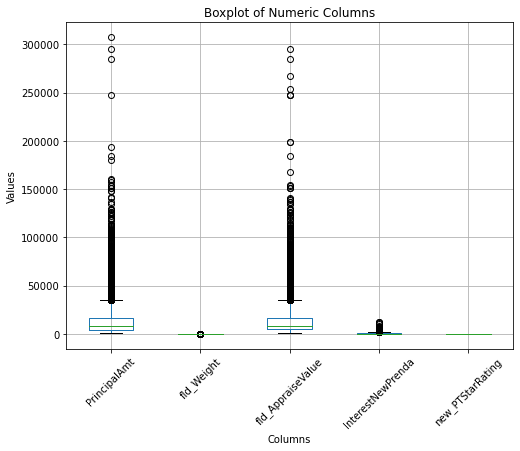

<Figure size 576x432 with 0 Axes>

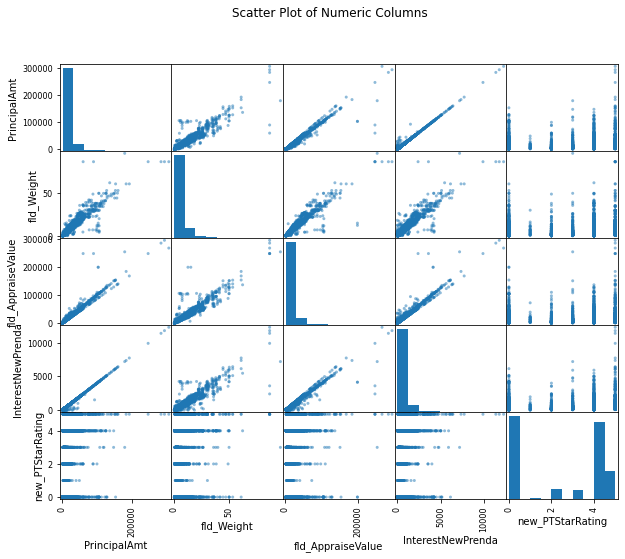

In [16]:
# Check Outliers
def check_visual_outliers(_df):

    # Select numeric columns
    numeric_cols = _df.select_dtypes(include='number')

    # Create box-plots for numeric columns
    plt.figure(figsize=(8, 6))
    _df.boxplot(column=list(numeric_cols.columns))
    plt.title('Boxplot of Numeric Columns')
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.show()

    # Create scatter plots for pairwise comparison of numeric columns
    plt.figure(figsize=(8, 6))
    pd.plotting.scatter_matrix(_df[numeric_cols.columns], figsize=(10, 8))
    plt.suptitle('Scatter Plot of Numeric Columns')
    plt.show()

check_visual_outliers(df)


In [17]:
# Determine Outlier Numeric Values
def find_outliers(_df, _threshold=2):

    numeric_cols = df.select_dtypes(include='number')
    z_scores = np.abs((numeric_cols - numeric_cols.mean()) / numeric_cols.std())

    _outlier = df[(z_scores > _threshold).any(axis=1)]
    _non_outlier = df[~(z_scores > _threshold).any(axis=1)]

    print('outliers:',_outlier.shape, 'non outiers:', _non_outlier.shape)
    return _outlier, _non_outlier

df_outlier, df_non_outlier = find_outliers(df)

outliers: (315, 26) non outiers: (6186, 26)


In [18]:
import pyarrow as pa
import pyarrow.parquet as pq

table = pa.Table.from_pandas(df_non_outlier)
pq.write_table(table, r'..\Data\Np_non_outliers.parquet')

table = pa.Table.from_pandas(df_outlier)
pq.write_table(table, r'..\Data\Np_outliers.parquet')